In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from scipy.stats import beta
from scipy.stats import lognorm

In [2]:
df = pd.read_excel('../data/블록-계획데이터(예제)_수정.xlsx')

In [3]:
df

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
0,M112,TK001,S18S0,06A0,대조중조,S031,TK,XXX,XXX,2022-12-01,...,2022-12-30 00:00:00,19.0,8,312,649,0,11.5,20.0,8.5,230.0
1,M112,CN047,S22P0,11A0,Final조립,S032,CN,XXX,XXX,2022-12-01,...,2022-12-27 00:00:00,15.0,26,1469,764,150,17.5,21.0,8.0,367.5
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12127,M222,TK005,S18P0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,315,0,0,6.0,20.0,8.5,120.0
12128,M222,TK005,S18P0,03B0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,641,0,0,7.5,20.0,8.5,150.0
12129,M221,TK005,S18S0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,315,0,0,6.0,20.0,8.5,120.0
12130,M010,TK005,S20P0,11A1,판계,XXX,TK,A11,A11,2025-04-29,...,,NaN,4,35,35,0,17.0,17.5,8.0,297.5


1. 선종_블록

In [7]:
group_list = []
for i in range(12132):
    group_code = df.loc[i, '선종_코드'] + '_' + df.loc[i, '블록'][0]
    group_list.append(group_code)

In [8]:
df['선종_블록'] = group_list

df

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,실적공기,H00,H01,H02,W,B,L,H,A,선종_블록
0,M112,TK001,S18S0,06A0,대조중조,S031,TK,XXX,XXX,2022-12-01,...,19.0,8,312,649,0,11.5,20.0,8.5,230.0,TK_S
1,M112,CN047,S22P0,11A0,Final조립,S032,CN,XXX,XXX,2022-12-01,...,15.0,26,1469,764,150,17.5,21.0,8.0,367.5,CN_S
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,22.0,0,1469,766,150,17.5,21.0,8.0,367.5,CN_S
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,7.0,17,475,914,0,13.0,18.0,4.5,234.0,CN_E
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,15.0,0,623,386,126,17.5,23.0,6.0,402.5,BC_F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12127,M222,TK005,S18P0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,NaN,0,315,0,0,6.0,20.0,8.5,120.0,TK_S
12128,M222,TK005,S18P0,03B0,곡중조,S221,TK,B09,B09,2025-04-29,...,NaN,0,641,0,0,7.5,20.0,8.5,150.0,TK_S
12129,M221,TK005,S18S0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,NaN,0,315,0,0,6.0,20.0,8.5,120.0,TK_S
12130,M010,TK005,S20P0,11A1,판계,XXX,TK,A11,A11,2025-04-29,...,NaN,4,35,35,0,17.0,17.5,8.0,297.5,TK_S


In [9]:
df.to_excel('../data/블록-계획데이터(예제)_블록 그룹 추가.xlsx')

In [10]:
df_group_count = pd.DataFrame(df['선종_블록'].value_counts())

df_group_count

,count
선종_블록,
CN_E,2310
LN_E,1615
CN_S,1133
CN_B,954
CN_F,553
LN_F,480
LP_V,461
CN_A,429
LN_B,418


In [11]:
df_group_count['proportion'] = df_group_count['count'] / df_group_count['count'].sum()

In [12]:
df_group_count

,count,proportion
선종_블록,,
CN_E,2310,0.190406
LN_E,1615,0.133119
CN_S,1133,0.093389
CN_B,954,0.078635
CN_F,553,0.045582
LN_F,480,0.039565
LP_V,461,0.037999
CN_A,429,0.035361
LN_B,418,0.034454


In [13]:
df_group_count.to_excel('../data/선종_블록 그룹 간 비율.xlsx')

In [14]:
df_duration_plan = df[['선종_블록', '계획공기', 'H01', 'H02']]

df_duration_plan

,선종_블록,계획공기,H01,H02
0,TK_S,8,312,649
1,CN_S,16,1469,764
2,CN_S,16,1469,766
3,CN_E,7,475,914
4,BC_F,9,623,386
...,...,...,...,...
12127,TK_S,6,315,0
12128,TK_S,5,641,0
12129,TK_S,6,315,0
12130,TK_S,2,35,35


In [15]:
def making_model_duration_plan(code):
    df_group_duration = df_duration_plan[df_duration_plan['선종_블록'] == code]
    x = df_group_duration[['H01', 'H02']]
    y = df_group_duration['계획공기']

    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    print(str(code) + ' 회귀계수 : ' + str(reg.coef_))
    print(str(code) + ' 절편 : '+ str(reg.intercept_))

    df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_

    return df_group_duration

In [16]:
df_example = making_model_duration_plan('CN_E')

CN_E 회귀계수 : [ 0.00690273 -0.00013294]
CN_E 절편 : 3.415176035358522


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_


In [18]:
df_example

,선종_블록,계획공기,H01,H02,fitted_result
3,CN_E,7,475,914,6.572466
16,CN_E,10,365,250,5.901437
17,CN_E,10,365,249,5.901570
18,CN_E,3,96,208,4.050187
19,CN_E,3,63,129,3.832899
...,...,...,...,...,...
12070,CN_E,6,549,556,7.130859
12079,CN_E,7,517,787,6.879264
12082,CN_E,6,554,1441,7.047724
12083,CN_E,7,559,1465,7.079047


In [19]:
for code in df_group_count.index:
    df_fitted = making_model_duration_plan(code)
    file_path = '../data/작업 공기_다변수_' + str(code) + '.xlsx'
    df_fitted.to_excel(file_path)

CN_E 회귀계수 : [ 0.00690273 -0.00013294]
CN_E 절편 : 3.415176035358522


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_


LN_E 회귀계수 : [ 0.00599775 -0.00067584]
LN_E 절편 : 3.7220680243482103
CN_S 회귀계수 : [ 0.00558176 -0.00049703]
CN_S 절편 : 4.588273842121149


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_


CN_B 회귀계수 : [ 4.66887850e-03 -3.82592834e-05]
CN_B 절편 : 4.928413593775673
CN_F 회귀계수 : [ 0.00526897 -0.00101148]
CN_F 절편 : 5.311297252324888
LN_F 회귀계수 : [ 0.00611322 -0.00243691]
LN_F 절편 : 4.505110661788175


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

LP_V 회귀계수 : [ 0.01461789 -0.00249039]
LP_V 절편 : 3.374445408091394
CN_A 회귀계수 : [ 0.00687777 -0.00029144]
CN_A 절편 : 3.999470374407938
LN_B 회귀계수 : [ 0.00576833 -0.00053499]
LN_B 절편 : 3.8485257114732954
LP_S 회귀계수 : [ 0.00690556 -0.00222415]
LP_S 절편 : 4.302273246477725


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

TK_E 회귀계수 : [ 0.00709941 -0.00202337]
TK_E 절편 : 4.131272005955931
LN_A 회귀계수 : [ 0.00524484 -0.00187047]
LN_A 절편 : 4.957282336778219
LP_E 회귀계수 : [ 0.00573194 -0.0010066 ]
LP_E 절편 : 4.363451139009075
TK_S 회귀계수 : [0.00284284 0.00248681]
TK_S 절편 : 3.696421425032703
LN_S 회귀계수 : [ 0.00614944 -0.00158816]
LN_S 절편 : 3.6772399143899976


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

CN_D 회귀계수 : [ 0.00760441 -0.00168589]
CN_D 절편 : 3.8421967713714955
LP_D 회귀계수 : [ 0.00814081 -0.00218528]
LP_D 절편 : 3.0255097622112515
PT_E 회귀계수 : [ 0.01137736 -0.00483211]
PT_E 절편 : 4.723905917456849
PT_B 회귀계수 : [ 0.01022843 -0.00364322]
PT_B 절편 : 4.08080287804496
LN_G 회귀계수 : [ 0.00510042 -0.00020656]
LN_G 절편 : 2.988876325469846
PT_S 회귀계수 : [0.0061883 0.0007418]
PT_S 절편 : 4.258467168546621
PT_A 회귀계수 : [ 0.00871149 -0.00182146]
PT_A 절편 : 3.5851059632716122


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

PT_F 회귀계수 : [ 0.0074268  -0.00435123]
PT_F 절편 : 6.0368869432271985
TK_A 회귀계수 : [ 0.00938466 -0.00293678]
TK_A 절편 : 4.2256310970488755
TK_F 회귀계수 : [ 0.0065313  -0.00016835]
TK_F 절편 : 4.886200609900537
LP_A 회귀계수 : [0.005974   0.00542893]
LP_A 절편 : 2.463419665618568
LP_F 회귀계수 : [ 0.00584574 -0.00190156]
LP_F 절편 : 5.006947213375628
LP_B 회귀계수 : [ 0.00643444 -0.00018853]
LP_B 절편 : 4.184056306842516
CN_T 회귀계수 : [0.00662588 0.0066364 ]
CN_T 절편 : 2.83627703913672
TK_B 회귀계수 : [0.00199366 0.00576944]
TK_B 절편 : 3.099092250319748
BC_E 회귀계수 : [ 0.0075614 -0.0050447]
BC_E 절편 : 4.343726203447155
VL_B 회귀계수 : [0.0055615  0.00155294]
VL_B 절편 : 3.2584531154433813


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

VL_S 회귀계수 : [ 0.00461281 -0.00262054]
VL_S 절편 : 3.299442491131395
BC_B 회귀계수 : [ 0.01477638 -0.01994837]
BC_B 절편 : 5.674101547723427
BC_S 회귀계수 : [0.00274954 0.00405519]
BC_S 절편 : 3.932039486448997
LN_D 회귀계수 : [0.0079745  0.00015293]
LN_D 절편 : 3.7060045874000895
BC_F 회귀계수 : [ 0.01275382 -0.02386396]
BC_F 절편 : 7.894170973569098
PT_D 회귀계수 : [ 0.01051183 -0.00276372]
PT_D 절편 : 3.4436566320477406
VL_F 회귀계수 : [ 0.00866358 -0.00511165]
VL_F 절편 : 4.902334920859249
PT_L 회귀계수 : [0.12867599 0.01418115]
PT_L 절편 : -4.008658998823684
PT_R 회귀계수 : [ 0.01257758 -0.00352451]
PT_R 절편 : 3.1830766628061893
BC_A 회귀계수 : [ 0.01246607 -0.01595438]
BC_A 절편 : 4.441165628843522
VL_A 회귀계수 : [0.02817567 0.01072493]
VL_A 절편 : 2.2434377953900984
VL_D 회귀계수 : [-0.75       -2.47777778]
VL_D 절편 : 325.672222222222


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

VL_E 회귀계수 : [0.00997046 0.00923191]
VL_E 절편 : -1.7943131462333852
CN_L 회귀계수 : [0. 0.]
CN_L 절편 : 7.0
LN_T 회귀계수 : [0. 0.]
LN_T 절편 : 3.0


C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3796258746.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_group_duration['fitted_result'] = reg.coef_[0] * df_group_duration['H01'] + reg.coef_[1] * df_group_duration['H02'] + reg.intercept_
C:\Users\kim

In [20]:
df_duration_plan[df_duration_plan['선종_블록'] == 'LN_T']

,선종_블록,계획공기,H01,H02
10855,LN_T,3,152,704
10856,LN_T,3,154,693


In [21]:
df_duration_plan[df_duration_plan['선종_블록'] == 'CN_L']

,선종_블록,계획공기,H01,H02
8397,CN_L,7,167,0
8398,CN_L,7,167,0


2. 주요 제원에 대한 분포모델

In [22]:
# L

df_L = df[['선종_블록', 'L']]

df_L

,선종_블록,L
0,TK_S,20.0
1,CN_S,21.0
2,CN_S,21.0
3,CN_E,18.0
4,BC_F,23.0
...,...,...
12127,TK_S,20.0
12128,TK_S,20.0
12129,TK_S,20.0
12130,TK_S,17.5


In [23]:
# B

df_B = df[['선종_블록', 'B']]

# W

df_W = df[['선종_블록', 'W']]

In [24]:
df_B

,선종_블록,B
0,TK_S,11.5
1,CN_S,17.5
2,CN_S,17.5
3,CN_E,13.0
4,BC_F,17.5
...,...,...
12127,TK_S,6.0
12128,TK_S,7.5
12129,TK_S,6.0
12130,TK_S,17.0


In [25]:
df_W

,선종_블록,W
0,TK_S,0
1,CN_S,150
2,CN_S,150
3,CN_E,0
4,BC_F,126
...,...,...
12127,TK_S,0
12128,TK_S,0
12129,TK_S,0
12130,TK_S,0


In [26]:
df_H = df[['선종_블록', 'H']]

In [27]:
df_L.value_counts()

선종_블록  L   
CN_S   20.0    226
CN_E   13.5    201
       15.0    192
LN_B   19.0    190
CN_B   20.0    190
              ... 
PT_A   10.5      1
CN_A   8.0       1
PT_A   2.5       1
LP_E   21.0      1
CN_B   10.0      1
Name: count, Length: 573, dtype: int64

In [28]:
df_example = df_L[df_L['선종_블록'] == 'LP_E']

In [29]:
df_example

,선종_블록,L
7,LP_E,14.0
8,LP_E,14.0
75,LP_E,14.0
76,LP_E,14.0
92,LP_E,8.0
...,...,...
12047,LP_E,21.0
12048,LP_E,9.0
12071,LP_E,14.5
12072,LP_E,14.5


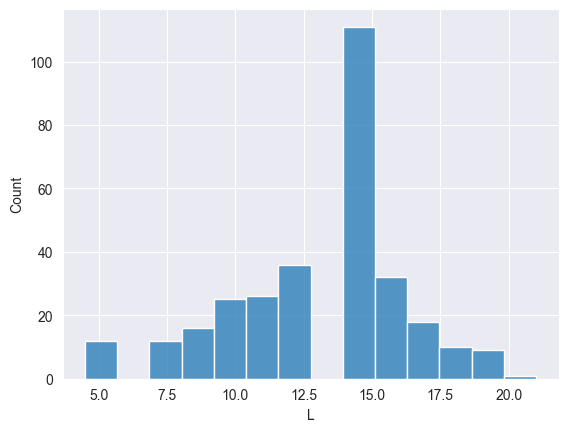

In [30]:
sns.histplot(data=df_example, x='L')
plt.show()

In [31]:
def making_model_property(property, code, fitting_method):
    if property == 'L':
        df_code = df_L[df_L['선종_블록'] == code]
        df_code_count = pd.DataFrame(df_code.value_counts())
        df_code_count.reset_index(inplace=True)
        df_code_count.sort_values('L', inplace=True)
        df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()

    elif property == 'B':
        df_code = df_B[df_B['선종_블록'] == code]
        df_code_count = pd.DataFrame(df_code.value_counts())
        df_code_count.reset_index(inplace=True)
        df_code_count.sort_values('B', inplace=True)
        df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()

    elif property == 'H':
        df_code = df_H[df_H['선종_블록'] == code]
        df_code_count = pd.DataFrame(df_code.value_counts())
        df_code_count.reset_index(inplace=True)
        df_code_count.sort_values('H', inplace=True)
        df_code_count['Density'] = df_code_count['count'] / df_code_count['count'].sum()

    if fitting_method == 'beta':
        df_forbeta = df_code_count[[property, 'Density']]
        array_forbeta = df_forbeta.to_numpy()
        a, b, loc, scale = beta.fit(array_forbeta)
        pdf_beta = beta.pdf(df_code_count[property], a, b, loc, scale)
        df_code_count['fitted_result'] = pdf_beta

    elif fitting_method == 'lognorm':
        df_lognorm = df_code_count[[property, 'Density']]
        array_lognorm = df_lognorm.to_numpy()
        s, loc, scale = lognorm.fit(array_lognorm[:, 1])
        pdf_lognorm = lognorm.pdf(df_code_count[property], s, loc, scale)
        df_code_count['fitted_result'] = pdf_lognorm

    return df_code_count

In [32]:
df_example = making_model_property('B', 'CN_B', 'beta')

In [33]:
df_example

,선종_블록,B,count,Density,fitted_result
28,CN_B,2.5,3,0.003145,0.059665
15,CN_B,3.0,13,0.013627,0.054664
1,CN_B,3.5,134,0.140461,0.050807
10,CN_B,4.0,32,0.033543,0.047724
16,CN_B,4.5,12,0.012579,0.045193
11,CN_B,5.0,24,0.025157,0.043072
2,CN_B,5.5,86,0.090147,0.041265
0,CN_B,6.0,192,0.201258,0.039707
14,CN_B,6.5,14,0.014675,0.038350
5,CN_B,7.0,40,0.041929,0.037156


In [34]:
df_example['count'].sum()

954

In [154]:
for code in df_group_count.index:
    for property in ['L', 'B', 'H']:
        df_property_code = making_model_property(property, code, 'beta')
        file_path = '../data/블록 제원 피팅_' + code + '_' + property + '.xlsx'
        df_property_code.to_excel(file_path)

C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:800: RuntimeWarning: The iteration is not making good progress, as measured by the 
 improvement from the last five Jacobian evaluations.
  a, b = optimize.fsolve(func, (1.0, 1.0))
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\stats\_continuous_distns.py:795: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\yyj\Project\전략과제\2025_MAS_KSOE\.venv\Lib\site-packages\scipy\sta

In [155]:
df_LBHW = df[['선종_블록', 'W', 'L', 'B', 'H']]
df_LBHW

,선종_블록,W,L,B,H
0,TK_S,0,20.0,11.5,8.5
1,CN_S,150,21.0,17.5,8.0
2,CN_S,150,21.0,17.5,8.0
3,CN_E,0,18.0,13.0,4.5
4,BC_F,126,23.0,17.5,6.0
...,...,...,...,...,...
12127,TK_S,0,20.0,6.0,8.5
12128,TK_S,0,20.0,7.5,8.5
12129,TK_S,0,20.0,6.0,8.5
12130,TK_S,0,17.5,17.0,8.0


In [156]:
df_LBHW['LBH'] = df_LBHW['L'] * df_LBHW['B'] * df_LBHW['H']

df_LBHW

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\165090667.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LBHW['LBH'] = df_LBHW['L'] * df_LBHW['B'] * df_LBHW['H']


,선종_블록,W,L,B,H,LBH
0,TK_S,0,20.0,11.5,8.5,1955.0
1,CN_S,150,21.0,17.5,8.0,2940.0
2,CN_S,150,21.0,17.5,8.0,2940.0
3,CN_E,0,18.0,13.0,4.5,1053.0
4,BC_F,126,23.0,17.5,6.0,2415.0
...,...,...,...,...,...,...
12127,TK_S,0,20.0,6.0,8.5,1020.0
12128,TK_S,0,20.0,7.5,8.5,1275.0
12129,TK_S,0,20.0,6.0,8.5,1020.0
12130,TK_S,0,17.5,17.0,8.0,2380.0


In [157]:
def making_model_weight(code):
    df_weight = df_LBHW[df_LBHW['선종_블록'] == code]
    x = df_weight['LBH']
    x = x.to_numpy()
    x = x.reshape(-1, 1)
    y = df_weight['W']
    y = y.to_numpy()

    reg = linear_model.LinearRegression()
    reg.fit(x, y)

    df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_
    return df_weight

In [158]:
making_model_weight('TK_S')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_


,선종_블록,W,L,B,H,LBH,fitted_result
0,TK_S,0,20.0,11.5,8.5,1955.000,105.311348
15,TK_S,300,20.0,23.5,8.5,3995.000,296.734271
26,TK_S,0,17.5,7.5,8.5,1115.625,26.548791
27,TK_S,0,17.5,6.5,8.5,966.875,12.590869
28,TK_S,0,17.5,5.5,8.5,818.125,-1.367052
...,...,...,...,...,...,...,...
12127,TK_S,0,20.0,6.0,8.5,1020.000,17.575841
12128,TK_S,0,20.0,7.5,8.5,1275.000,41.503707
12129,TK_S,0,20.0,6.0,8.5,1020.000,17.575841
12130,TK_S,0,17.5,17.0,8.0,2380.000,145.191123


In [159]:
for code in df_group_count.index:
    df_fitted = making_model_weight(code)
    file_path = '../data/무게 적합_' + code + '.xlsx'
    df_fitted.to_excel(file_path)

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_weight['fitted_result'] = reg.coef_[0] * df_weight['LBH'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2240756173.py:12: SettingWithCopyWarning: 
A value is trying to be set on a co

In [160]:
df_H01 = df[['선종_블록', 'H01', 'W', 'L', 'B', 'H']]
df_H01

,선종_블록,H01,W,L,B,H
0,TK_S,312,0,20.0,11.5,8.5
1,CN_S,1469,150,21.0,17.5,8.0
2,CN_S,1469,150,21.0,17.5,8.0
3,CN_E,475,0,18.0,13.0,4.5
4,BC_F,623,126,23.0,17.5,6.0
...,...,...,...,...,...,...
12127,TK_S,315,0,20.0,6.0,8.5
12128,TK_S,641,0,20.0,7.5,8.5
12129,TK_S,315,0,20.0,6.0,8.5
12130,TK_S,35,0,17.5,17.0,8.0


In [161]:
df_H02 = df[['선종_블록', 'H02', 'W', 'L', 'B', 'H']]
df_H02

,선종_블록,H02,W,L,B,H
0,TK_S,649,0,20.0,11.5,8.5
1,CN_S,764,150,21.0,17.5,8.0
2,CN_S,766,150,21.0,17.5,8.0
3,CN_E,914,0,18.0,13.0,4.5
4,BC_F,386,126,23.0,17.5,6.0
...,...,...,...,...,...,...
12127,TK_S,0,0,20.0,6.0,8.5
12128,TK_S,0,0,20.0,7.5,8.5
12129,TK_S,0,0,20.0,6.0,8.5
12130,TK_S,35,0,17.5,17.0,8.0


In [39]:
def making_model_working(code):
    df_work = df[['선종_블록', 'H01', 'H02', 'W', 'L', 'B', 'H']]
    df_work_code = df_work[df_work['선종_블록'] == code]

    x = df_work_code[['W', 'L', 'B', 'H']]
    y_1 = df_work_code['H01']
    y_2 = df_work_code['H02']

    reg_1 = linear_model.LinearRegression()
    reg_2 = linear_model.LinearRegression()
    reg_1.fit(x, y_1)
    reg_2.fit(x, y_2)

    df_work_code['fit_result_H01'] = reg_1.coef_[0] * df_work_code['W'] + reg_1.coef_[1] * df_work_code['L'] + reg_1.coef_[2] * df_work_code['B'] + reg_1.coef_[3] * df_work_code['H'] + reg_1.intercept_
    df_work_code['fit_result_H02'] = reg_2.coef_[0] * df_work_code['W'] + reg_2.coef_[1] * df_work_code['L'] + reg_2.coef_[2] * df_work_code['B'] + reg_2.coef_[3] * df_work_code['H'] + reg_2.intercept_

    return df_work_code

In [40]:
making_model_working('TK_S')

C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3499517047.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fit_result_H01'] = reg_1.coef_[0] * df_work_code['W'] + reg_1.coef_[1] * df_work_code['L'] + reg_1.coef_[2] * df_work_code['B'] + reg_1.coef_[3] * df_work_code['H'] + reg_1.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_23644\3499517047.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fit_result_H02'] = reg_2.coef_[0] * df_work_code['W'] + reg_2.coef_[1] *

,선종_블록,H01,H02,W,L,B,H,fit_result_H01,fit_result_H02
0,TK_S,312,649,0,20.0,11.5,8.5,234.100257,317.698693
15,TK_S,1305,683,300,20.0,23.5,8.5,1183.442443,847.328753
26,TK_S,613,225,0,17.5,7.5,8.5,249.295587,259.132744
27,TK_S,538,244,0,17.5,6.5,8.5,262.383369,262.074636
28,TK_S,40,96,0,17.5,5.5,8.5,275.471151,265.016529
...,...,...,...,...,...,...,...,...,...
12127,TK_S,315,0,0,20.0,6.0,8.5,306.083059,333.879102
12128,TK_S,641,0,0,20.0,7.5,8.5,286.451386,329.466263
12129,TK_S,315,0,0,20.0,6.0,8.5,306.083059,333.879102
12130,TK_S,35,35,0,17.5,17.0,8.0,141.970894,248.140485


In [164]:
for code in df_group_count.index:
    for work in ['H01', 'H02']:
        df_work = making_model_working(work, code)
        file_path = '../data/작업량_' + code + '_' + work + '.xlsx'
        df_work.to_excel(file_path)

C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2524054855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fitted_result'] = reg.coef_[0] * df_work_code['W'] + reg.coef_[1] * df_work_code['L'] + reg.coef_[2] * df_work_code['B'] + reg.coef_[3] * df_work_code['H'] + reg.intercept_
C:\Users\kimjh\AppData\Local\Temp\ipykernel_55436\2524054855.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_work_code['fitted_result'] = reg.coef_[0] * df_work_code['W'] + reg.coef_[1] * df_work_code['L

Process type


In [18]:
df

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
0,M112,TK001,S18S0,06A0,대조중조,S031,TK,XXX,XXX,2022-12-01,...,2022-12-30 00:00:00,19.0,8,312,649,0,11.5,20.0,8.5,230.0
1,M112,CN047,S22P0,11A0,Final조립,S032,CN,XXX,XXX,2022-12-01,...,2022-12-27 00:00:00,15.0,26,1469,764,150,17.5,21.0,8.0,367.5
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12127,M222,TK005,S18P0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,315,0,0,6.0,20.0,8.5,120.0
12128,M222,TK005,S18P0,03B0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,641,0,0,7.5,20.0,8.5,150.0
12129,M221,TK005,S18S0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,315,0,0,6.0,20.0,8.5,120.0
12130,M010,TK005,S20P0,11A1,판계,XXX,TK,A11,A11,2025-04-29,...,,NaN,4,35,35,0,17.0,17.5,8.0,297.5


In [19]:
df_revised = df.dropna(axis=0)

In [20]:
df_revised

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
0,M112,TK001,S18S0,06A0,대조중조,S031,TK,XXX,XXX,2022-12-01,...,2022-12-30 00:00:00,19.0,8,312,649,0,11.5,20.0,8.5,230.0
1,M112,CN047,S22P0,11A0,Final조립,S032,CN,XXX,XXX,2022-12-01,...,2022-12-27 00:00:00,15.0,26,1469,764,150,17.5,21.0,8.0,367.5
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,M010,CN035,D35P0,05A1,판계,XXX,CN,A11,A11,2025-04-25,...,2025-04-28 00:00:00,2.0,5,26,127,0,5.5,13.0,6.0,71.5
12069,M010,CN035,D35S0,05A1,판계,XXX,CN,A11,A11,2025-04-25,...,2025-04-28 00:00:00,2.0,5,26,127,0,5.5,13.0,6.0,71.5
12080,M010,CN044,D34P0,05B1,판계,XXX,CN,A11,A11,2025-04-26,...,2025-04-29 00:00:00,3.0,9,39,257,0,14.5,7.0,7.0,101.5
12085,M010,TK005,E51P0,05A1,판계,XXX,TK,A11,A11,2025-04-26,...,2025-04-29 00:00:00,3.0,29,150,606,0,18.5,14.0,7.0,259.0


In [21]:
idx_1 = df_revised[df_revised['취부팀_코드'] == 'XXX'].index
idx_2 = df_revised[df_revised['용접팀_코드'] == 'XXX'].index

print('Index 1: ', idx_1)
print('Index 2: ', idx_2)

Index 1:  Index([   0,    1,   10,   11,  104,  109,  112,  127,  151,  184,
       ...
       1749, 1793, 1851, 1887, 1892, 1893, 1896, 1897, 1939, 1994],
      dtype='int64', length=105)
Index 2:  Index([   0,    1,   10,   11,  104,  109,  112,  127,  151,  184,
       ...
       1749, 1793, 1851, 1887, 1892, 1893, 1896, 1897, 1939, 1994],
      dtype='int64', length=106)


In [22]:
df_revised = df_revised.drop(idx_2)

In [23]:
df_revised

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
5,M010,BC002,B52P0,06A1,판계,XXX,BC,A11,A11,2022-12-01,...,2022-12-05 00:00:00,3.0,24,93,202,0,11.0,17.5,4.5,192.5
6,M010,BC002,B52S0,06A1,판계,XXX,BC,A11,A11,2022-12-01,...,2022-12-05 00:00:00,3.0,24,93,202,0,11.0,17.5,4.5,192.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12068,M010,CN035,D35P0,05A1,판계,XXX,CN,A11,A11,2025-04-25,...,2025-04-28 00:00:00,2.0,5,26,127,0,5.5,13.0,6.0,71.5
12069,M010,CN035,D35S0,05A1,판계,XXX,CN,A11,A11,2025-04-25,...,2025-04-28 00:00:00,2.0,5,26,127,0,5.5,13.0,6.0,71.5
12080,M010,CN044,D34P0,05B1,판계,XXX,CN,A11,A11,2025-04-26,...,2025-04-29 00:00:00,3.0,9,39,257,0,14.5,7.0,7.0,101.5
12085,M010,TK005,E51P0,05A1,판계,XXX,TK,A11,A11,2025-04-26,...,2025-04-29 00:00:00,3.0,29,150,606,0,18.5,14.0,7.0,259.0


In [43]:
idx_3 = df_revised[df_revised['stage_코드'] == 'XXX'].index
df_revised = df_revised.drop(idx_3)

df_revised

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
9,M012,TK011,F51S0,11B0,곡중조,S021,VL,A03,A04,2022-12-01,...,2022-12-12 00:00:00,7.0,40,267,145,0,6.5,7.0,9.5,45.5
12,M025,LN017,B19S0,03A0,Final조립,S032,LN,A05,B03,2022-12-01,...,2022-12-16 00:00:00,11.0,70,492,243,124,18.0,19.0,3.0,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,M221,CN034,B20P0,03B0,대조중조,S031,CN,B09,B09,2025-04-19,...,2025-04-28 00:00:00,7.0,0,521,593,0,8.0,19.5,2.5,156.0
11959,M011,LP004,S13P0,03A0,곡중조,S221,LP,B07,B07,2025-04-19,...,2025-04-25 00:00:00,6.0,0,318,0,0,5.0,19.5,6.5,97.5
11960,M011,LP004,S13S0,03A0,곡중조,S221,LP,B07,B07,2025-04-19,...,2025-04-25 00:00:00,5.0,0,318,0,0,5.0,19.5,6.5,97.5
11971,M033,LN004,S11P0,11A0,Final조립,S032,LN,B08,B08,2025-04-21,...,2025-04-25 00:00:00,5.0,0,427,435,121,24.5,19.0,9.5,465.5


In [46]:
idx_4 = df_revised[df_revised['정반_코드'] == 'XXXX'].index
df_revised = df_revised.drop(idx_4)

In [48]:
df_revised

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
9,M012,TK011,F51S0,11B0,곡중조,S021,VL,A03,A04,2022-12-01,...,2022-12-12 00:00:00,7.0,40,267,145,0,6.5,7.0,9.5,45.5
12,M025,LN017,B19S0,03A0,Final조립,S032,LN,A05,B03,2022-12-01,...,2022-12-16 00:00:00,11.0,70,492,243,124,18.0,19.0,3.0,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,M221,CN034,B20P0,03B0,대조중조,S031,CN,B09,B09,2025-04-19,...,2025-04-28 00:00:00,7.0,0,521,593,0,8.0,19.5,2.5,156.0
11959,M011,LP004,S13P0,03A0,곡중조,S221,LP,B07,B07,2025-04-19,...,2025-04-25 00:00:00,6.0,0,318,0,0,5.0,19.5,6.5,97.5
11960,M011,LP004,S13S0,03A0,곡중조,S221,LP,B07,B07,2025-04-19,...,2025-04-25 00:00:00,5.0,0,318,0,0,5.0,19.5,6.5,97.5
11971,M033,LN004,S11P0,11A0,Final조립,S032,LN,B08,B08,2025-04-21,...,2025-04-25 00:00:00,5.0,0,427,435,121,24.5,19.0,9.5,465.5


In [49]:
idx_5 = df_revised[df_revised['실적공기'] < 0].index
df_revised = df_revised.drop(idx_5)

In [50]:
df_revised

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
9,M012,TK011,F51S0,11B0,곡중조,S021,VL,A03,A04,2022-12-01,...,2022-12-12 00:00:00,7.0,40,267,145,0,6.5,7.0,9.5,45.5
12,M025,LN017,B19S0,03A0,Final조립,S032,LN,A05,B03,2022-12-01,...,2022-12-16 00:00:00,11.0,70,492,243,124,18.0,19.0,3.0,342.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11955,M221,CN034,B20P0,03B0,대조중조,S031,CN,B09,B09,2025-04-19,...,2025-04-28 00:00:00,7.0,0,521,593,0,8.0,19.5,2.5,156.0
11959,M011,LP004,S13P0,03A0,곡중조,S221,LP,B07,B07,2025-04-19,...,2025-04-25 00:00:00,6.0,0,318,0,0,5.0,19.5,6.5,97.5
11960,M011,LP004,S13S0,03A0,곡중조,S221,LP,B07,B07,2025-04-19,...,2025-04-25 00:00:00,5.0,0,318,0,0,5.0,19.5,6.5,97.5
11971,M033,LN004,S11P0,11A0,Final조립,S032,LN,B08,B08,2025-04-21,...,2025-04-25 00:00:00,5.0,0,427,435,121,24.5,19.0,9.5,465.5


In [51]:
df_revised.to_excel('../data/블록-계획데이터(예제)_이상치 제외.xlsx')

In [52]:
df_revised['공종_명칭'].value_counts()

공종_명칭
Final조립    2836
곡중조        2044
대조중조       1596
평중조         463
Name: count, dtype: int64

In [53]:
df_process_count = pd.DataFrame(df_revised['공종_명칭'].value_counts())
df_process_count.reset_index(inplace=True)
df_process_count = df_process_count.reindex([3, 1, 2, 0])
df_process_count

,공종_명칭,count
3,평중조,463
1,곡중조,2044
2,대조중조,1596
0,Final조립,2836


In [54]:
df_process_count.reset_index(inplace=True)

df_process_count

,index,공종_명칭,count
0,3,평중조,463
1,1,곡중조,2044
2,2,대조중조,1596
3,0,Final조립,2836


In [25]:
# 판계->평중조->곡중조->대조중조->Final조립
df_process_count = pd.DataFrame(df_revised['공종_명칭'].value_counts())
df_process_count.reset_index(inplace=True)
df_process_count

,공종_명칭,count
0,판계,4204
1,Final조립,2979
2,곡중조,2054
3,대조중조,1601
4,평중조,604


In [26]:
df_process_count['Proportion'] = df_process_count['count'] / df_process_count['count'].sum()
df_process_count

,공종_명칭,count,Proportion
0,판계,4204,0.367418
1,Final조립,2979,0.260357
2,곡중조,2054,0.179514
3,대조중조,1601,0.139923
4,평중조,604,0.052788


In [27]:
df_process_count = df_process_count.reindex([0, 4, 2, 3, 1])
df_process_count

,공종_명칭,count,Proportion
0,판계,4204,0.367418
4,평중조,604,0.052788
2,곡중조,2054,0.179514
3,대조중조,1601,0.139923
1,Final조립,2979,0.260357


In [28]:
df_process_count.reset_index(inplace=True)
df_process_count

,index,공종_명칭,count,Proportion
0,0,판계,4204,0.367418
1,4,평중조,604,0.052788
2,2,곡중조,2054,0.179514
3,3,대조중조,1601,0.139923
4,1,Final조립,2979,0.260357


In [29]:
df

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
0,M112,TK001,S18S0,06A0,대조중조,S031,TK,XXX,XXX,2022-12-01,...,2022-12-30 00:00:00,19.0,8,312,649,0,11.5,20.0,8.5,230.0
1,M112,CN047,S22P0,11A0,Final조립,S032,CN,XXX,XXX,2022-12-01,...,2022-12-27 00:00:00,15.0,26,1469,764,150,17.5,21.0,8.0,367.5
2,M212,CN047,S22S0,11A0,Final조립,S032,CN,B02,B02,2022-12-01,...,2022-12-23 00:00:00,22.0,0,1469,766,150,17.5,21.0,8.0,367.5
3,M024,CN011,E22P0,11A0,곡중조,S021,CN,B04,B04,2022-12-01,...,2022-12-09 00:00:00,7.0,17,475,914,0,13.0,18.0,4.5,234.0
4,M211,BC001,F51P0,05A0,Final조립,S032,BC,B02,B02,2022-12-01,...,2022-12-13 00:00:00,15.0,0,623,386,126,17.5,23.0,6.0,402.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12127,M222,TK005,S18P0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,315,0,0,6.0,20.0,8.5,120.0
12128,M222,TK005,S18P0,03B0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,641,0,0,7.5,20.0,8.5,150.0
12129,M221,TK005,S18S0,03A0,곡중조,S221,TK,B09,B09,2025-04-29,...,,NaN,0,315,0,0,6.0,20.0,8.5,120.0
12130,M010,TK005,S20P0,11A1,판계,XXX,TK,A11,A11,2025-04-29,...,,NaN,4,35,35,0,17.0,17.5,8.0,297.5


In [38]:
df[df['stage_코드'] == 'XXX']

,정반_코드,호선_코드,블록,단위블록_CODE,공종_명칭,stage_코드,선종_코드,취부팀_코드,용접팀_코드,착수계획,...,완료실적,실적공기,H00,H01,H02,W,B,L,H,A
5,M010,BC002,B52P0,06A1,판계,XXX,BC,A11,A11,2022-12-01,...,2022-12-05 00:00:00,3.0,24,93,202,0,11.0,17.5,4.5,192.5
6,M010,BC002,B52S0,06A1,판계,XXX,BC,A11,A11,2022-12-01,...,2022-12-05 00:00:00,3.0,24,93,202,0,11.0,17.5,4.5,192.5
7,M010,LP009,E51P0,11A1,판계,XXX,LP,A11,A11,2022-12-01,...,2022-12-02 00:00:00,2.0,9,50,36,0,7.5,14.0,8.5,105.0
8,M010,LP009,E51S0,11A1,판계,XXX,LP,A11,A11,2022-12-01,...,2022-12-02 00:00:00,2.0,10,50,36,0,7.5,14.0,8.0,105.0
18,M010,CN052,E43C0,05A1,판계,XXX,CN,A11,A11,2022-12-02,...,2022-12-05 00:00:00,2.0,23,96,208,0,13.5,14.0,1.5,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12121,M010,LP004,S18S0,06B1,판계,XXX,LP,A11,A11,2025-04-29,...,,NaN,4,13,72,0,4.0,7.0,8.0,28.0
12123,M010,TK005,A21P0,05A1,판계,XXX,TK,A11,A11,2025-04-29,...,,NaN,15,77,300,0,12.0,16.5,8.5,198.0
12124,M010,TK005,A21S0,05A1,판계,XXX,TK,A11,A11,2025-04-29,...,,NaN,14,77,291,0,12.0,16.5,8.5,198.0
12130,M010,TK005,S20P0,11A1,판계,XXX,TK,A11,A11,2025-04-29,...,,NaN,4,35,35,0,17.0,17.5,8.0,297.5
